Inter-Annotator Agreement Analysis
Comparing Human vs LLM Role Annotations
This notebook calculates inter-annotator agreement between human and LLM annotations for the 'role' column.


In [44]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

In [46]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.width', None)

# === ADJUST THESE PATHS ===
HUMAN_PATH = '../result/human/optimized_annotations_SHORT_human.csv'
LLM_PATH = '../result/flattened-by-expression/short/optimized_annotations_SHORT.csv'

# Load human annotations
human_df = pd.read_csv(HUMAN_PATH)
print(f"Human annotations: {human_df.shape[0]} rows, {human_df.shape[1]} columns")

# Load LLM annotations
llm_df = pd.read_csv(LLM_PATH)
print(f"LLM annotations: {llm_df.shape[0]} rows, {llm_df.shape[1]} columns")

Human annotations: 50 rows, 29 columns
LLM annotations: 50 rows, 29 columns


In [47]:
# Human annotation columns
print("Human annotation columns:")
print(list(human_df.columns))
print("_"*50)
# LLM annotation columns
print("LLM annotation columns:")
print(list(llm_df.columns))

Human annotation columns:
['thesis_code', 'section', 'sentence', 'expression_number', 'expression', 'is_reflexive', 'reflexivity_type', 'reflexivity_reasoning', 'scope_classification', 'scope_reach', 'scope_reasoning', 'L1_classification', 'L1_reasoning', 'L2_classification', 'L2_reasoning', 'L3_classification', 'L3_borderline', 'L3_reasoning', 'L1_borderline_is', 'L1_borderline_dominant', 'L1_borderline_secondary', 'L1_borderline_why', 'L2_borderline_is', 'L2_borderline_primary', 'L2_borderline_secondary', 'L2_borderline_tertiary', 'L2_borderline_strength', 'L2_borderline_why', 'comprehensive_justification']
__________________________________________________
LLM annotation columns:
['thesis_code', 'section', 'sentence', 'expression_number', 'expression', 'is_reflexive', 'reflexivity_type', 'reflexivity_reasoning', 'scope_classification', 'scope_reach', 'scope_reasoning', 'L1_classification', 'L1_reasoning', 'L2_classification', 'L2_reasoning', 'L3_classification', 'L3_borderline', 'L3

## Compare and Align Columns (CREATING UID)
We keep only columns that exist in the human annotations (our reference).

In [48]:
# Find column differences
human_cols = set(human_df.columns)
llm_cols = set(llm_df.columns)

common_cols = human_cols & llm_cols
only_in_human = human_cols - llm_cols
only_in_llm = llm_cols - human_cols

print(f"Common columns: {len(common_cols)}")
print(f"Only in human: {len(only_in_human)}")
print(f"Only in LLM: {len(only_in_llm)}")

Common columns: 29
Only in human: 0
Only in LLM: 0


In [49]:
# Columns only in LLM (will be dropped)
if only_in_llm:
    print("Columns in LLM but NOT in Human (will be dropped):")
    for col in sorted(only_in_llm):
        print(f"  - {col}")
else:
    print("No extra columns in LLM")
print("_"*50)
# Columns only in human (missing from LLM)
if only_in_human:
    print("Columns in Human but NOT in LLM (missing):")
    for col in sorted(only_in_human):
        print(f"  - {col}")
else:
    print("No missing columns in Human code")

No extra columns in LLM
__________________________________________________
No missing columns in Human code


In [50]:
# Keep only human columns (in same order)
cols_to_keep = [col for col in human_df.columns if col in llm_cols]

human_aligned = human_df[cols_to_keep].copy()
llm_aligned = llm_df[cols_to_keep].copy()

print(f"Aligned human: {human_aligned.shape}")
print(f"Aligned LLM: {llm_aligned.shape}")
print(f"\nColumns kept: {cols_to_keep}")

Aligned human: (50, 29)
Aligned LLM: (50, 29)

Columns kept: ['thesis_code', 'section', 'sentence', 'expression_number', 'expression', 'is_reflexive', 'reflexivity_type', 'reflexivity_reasoning', 'scope_classification', 'scope_reach', 'scope_reasoning', 'L1_classification', 'L1_reasoning', 'L2_classification', 'L2_reasoning', 'L3_classification', 'L3_borderline', 'L3_reasoning', 'L1_borderline_is', 'L1_borderline_dominant', 'L1_borderline_secondary', 'L1_borderline_why', 'L2_borderline_is', 'L2_borderline_primary', 'L2_borderline_secondary', 'L2_borderline_tertiary', 'L2_borderline_strength', 'L2_borderline_why', 'comprehensive_justification']


In [51]:
# Examine key columns in both datasets

# --- is_reflexive ---
print("IS_REFLEXIVE Distribution:")
print("-" * 40)
print("Human:")
print(human_aligned['is_reflexive'].value_counts())
print("\nLLM:")
print(llm_aligned['is_reflexive'].value_counts())

# --- scope_classification ---
print("\n" + "=" * 40)
print("SCOPE_CLASSIFICATION Distribution:")
print("-" * 40)
print("Human:")
print(human_aligned['scope_classification'].value_counts())
print("\nLLM:")
print(llm_aligned['scope_classification'].value_counts())

# --- L1_classification ---
print("\n" + "=" * 40)
print("L1_CLASSIFICATION Distribution:")
print("-" * 40)
print("Human:")
print(human_aligned['L1_classification'].value_counts())
print("\nLLM:")
print(llm_aligned['L1_classification'].value_counts())

# --- L2_classification ---
print("\n" + "=" * 40)
print("L2_CLASSIFICATION Distribution:")
print("-" * 40)
print("Human:")
print(human_aligned['L2_classification'].value_counts(dropna=False))
print("\nLLM:")
print(llm_aligned['L2_classification'].value_counts(dropna=False))

# --- L3_classification ---
print("\n" + "=" * 40)
print("L3_CLASSIFICATION Distribution:")
print("-" * 40)
print("Human:")
print(human_aligned['L3_classification'].value_counts(dropna=False))
print("\nLLM:")
print(llm_aligned['L3_classification'].value_counts(dropna=False))

IS_REFLEXIVE Distribution:
----------------------------------------
Human:
is_reflexive
True     25
False    25
Name: count, dtype: int64

LLM:
is_reflexive
False    28
True     22
Name: count, dtype: int64

SCOPE_CLASSIFICATION Distribution:
----------------------------------------
Human:
scope_classification
MICRO    24
MESO     12
MACRO    11
Name: count, dtype: int64

LLM:
scope_classification
MICRO    25
MESO     11
MACRO    11
Name: count, dtype: int64

L1_CLASSIFICATION Distribution:
----------------------------------------
Human:
L1_classification
MD      46
PROP     4
Name: count, dtype: int64

LLM:
L1_classification
MD      47
PROP     3
Name: count, dtype: int64

L2_CLASSIFICATION Distribution:
----------------------------------------
Human:
L2_classification
INT_ACTIVE      39
INT_ACTIONAL     8
NaN              3
Name: count, dtype: int64

LLM:
L2_classification
INT_ACTIVE      39
INT_ACTIONAL     8
NaN              3
Name: count, dtype: int64

L3_CLASSIFICATION Distributi

In [52]:
# # Align datasets - this assumes both datasets have some common identifier
#
# def align_annotations(human_df, llm_df, id_column=None):
#     """
#     Align human and LLM annotations based on a common identifier.
#     If no id_column is specified, assumes same order and length.
#     """
#     if human_df is None or llm_df is None:
#         return None, None
#
#     if id_column and id_column in human_df.columns and id_column in llm_df.columns:
#         # Merge on common identifier
#         merged = pd.merge(human_df, llm_df, on=id_column, suffixes=('_human', '_llm'))
#         return merged['role_human'], merged['role_llm']
#     else:
#         # Assume same order and length
#         min_len = min(len(human_df), len(llm_df))
#         return human_df['role'][:min_len], llm_df['role'][:min_len]
#
# # Aligning the data based on sentence (adjust id_column as needed)
#
# human_roles, llm_roles = align_annotations(human_df, llm_df, id_column=None)
#
# if human_roles is not None and llm_roles is not None:
#     print(f"Aligned dataset size: {len(human_roles)}")
#     print(f"Sample alignment check:")
#     comparison_df = pd.DataFrame({
#         'Human': human_roles.head(10),
#         'LLM': llm_roles.head(10)
#     })
#     print(comparison_df)
# else:
#     print("Could not align the datasets. Please check data loading and column names.")

In [53]:
# Columns to use for unique ID
id_cols = ['thesis_code', 'section', 'sentence', 'expression_number']

# Create UID
human_aligned['uid'] = human_aligned[id_cols].astype(str).agg('|'.join, axis=1)
llm_aligned['uid'] = llm_aligned[id_cols].astype(str).agg('|'.join, axis=1)

print("Sample UIDs:")
print(human_aligned['uid'].head())

Sample UIDs:
0    AP1|Introduction|Below, Figure 1.1 visualises ...
1    AP1|Introduction|Below, Figure 1.1 visualises ...
2    AP1|Introduction|Below, Figure 1.1 visualises ...
3    AP1|Introduction|Finally, the structure of the...
4    AP1|Introduction|Finally, the structure of the...
Name: uid, dtype: object


In [54]:
# Check for duplicates
human_dups = human_aligned['uid'].duplicated().sum()
llm_dups = llm_aligned['uid'].duplicated().sum()

print(f"Duplicate UIDs in human: {human_dups}")
print(f"Duplicate UIDs in LLM: {llm_dups}")

Duplicate UIDs in human: 0
Duplicate UIDs in LLM: 0


In [55]:
human_uids = set(human_aligned['uid'])
llm_uids = set(llm_aligned['uid'])

common_items = human_uids & llm_uids
only_human = human_uids - llm_uids
only_llm = llm_uids - human_uids

print(f"Items in human: {len(human_uids)}")
print(f"Items in LLM: {len(llm_uids)}")
print(f"Common items: {len(common_items)}")
print(f"Only in human: {len(only_human)}")
print(f"Only in LLM: {len(only_llm)}")

Items in human: 50
Items in LLM: 50
Common items: 50
Only in human: 0
Only in LLM: 0


In [56]:
# Merge on UID
merged = pd.merge(
    human_aligned,
    llm_aligned,
    on='uid',
    suffixes=('_human', '_llm'),
    how='inner'
)

print(f"Merged dataset: {merged.shape[0]} rows, {merged.shape[1]} columns")

Merged dataset: 50 rows, 59 columns


In [57]:
# Preview merged data
merged.head()

,thesis_code_human,section_human,sentence_human,expression_number_human,expression_human,is_reflexive_human,reflexivity_type_human,reflexivity_reasoning_human,scope_classification_human,scope_reach_human,scope_reasoning_human,L1_classification_human,L1_reasoning_human,L2_classification_human,L2_reasoning_human,L3_classification_human,L3_borderline_human,L3_reasoning_human,L1_borderline_is_human,L1_borderline_dominant_human,L1_borderline_secondary_human,L1_borderline_why_human,L2_borderline_is_human,L2_borderline_primary_human,L2_borderline_secondary_human,L2_borderline_tertiary_human,L2_borderline_strength_human,L2_borderline_why_human,comprehensive_justification_human,uid,thesis_code_llm,section_llm,sentence_llm,expression_number_llm,expression_llm,is_reflexive_llm,reflexivity_type_llm,reflexivity_reasoning_llm,scope_classification_llm,scope_reach_llm,scope_reasoning_llm,L1_classification_llm,L1_reasoning_llm,L2_classification_llm,L2_reasoning_llm,L3_classification_llm,L3_borderline_llm,L3_reasoning_llm,L1_borderline_is_llm,L1_borderline_dominant_llm,L1_borderline_secondary_llm,L1_borderline_why_llm,L2_borderline_is_llm,L2_borderline_primary_llm,L2_borderline_secondary_llm,L2_borderline_tertiary_llm,L2_borderline_strength_llm,L2_borderline_why_llm,comprehensive_justification_llm
0,AP1,Introduction,"Below, Figure 1.1 visualises this:",1,Below,True,text,Points to a location within the current text l...,MICRO,Directs attention to the immediately following...,Its functional reach is local navigation to th...,MD,Text-reflexive deictic; removal leaves proposi...,INT_ACTIVE,Guides reader through the text’s internal orga...,Endophoric Marker,False,Prototypical internal pointing to a text locat...,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,‘Below’ is a text-reflexive deictic guiding th...,"AP1|Introduction|Below, Figure 1.1 visualises ...",AP1,Introduction,"Below, Figure 1.1 visualises this:",1,Below,True,text,Points to a location within the current text l...,MICRO,Directs attention to the immediately following...,Its functional reach is local navigation to th...,MD,Text-reflexive deictic; removal leaves proposi...,INT_ACTIVE,Guides reader through the text’s internal orga...,Endophoric Marker,False,Prototypical internal pointing to a text locat...,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,‘Below’ is a text-reflexive deictic guiding th...
1,AP1,Introduction,"Below, Figure 1.1 visualises this:",2,Figure 1.1,True,text,Names an internal text element (Figure 1.1) wi...,MICRO,"References a single, immediately relevant figu...",It points to a specific text element rather th...,MD,Text-reflexive reference; removing it preserve...,INT_ACTIVE,Organizes the reader’s navigation to an intern...,Endophoric Marker,False,Canonical internal cross-reference to a labele...,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,‘Figure 1.1’ is a text-internal cross-referenc...,"AP1|Introduction|Below, Figure 1.1 visualises ...",AP1,Introduction,"Below, Figure 1.1 visualises this:",2,Figure 1.1,True,text,Names an internal text element (Figure 1.1) wi...,MICRO,"References a single, immediately relevant figu...",It points to a specific text element rather th...,MD,Text-reflexive reference; removing it preserve...,INT_ACTIVE,Organizes the reader’s navigation to an intern...,Endophoric Marker,False,Canonical internal cross-reference to a labele...,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,‘Figure 1.1’ is a text-internal cross-referenc...
2,AP1,Introduction,"Below, Figure 1.1 visualises this:",3,this,True,text,Anaphorically refers to preceding discourse co...,MESO,Links back to the immediately preceding discus...,The pointer reaches beyond the clause to a pri...,MD,Text-reflexive anaphora; removal leaves the pr...,INT_ACTIVE,Provides cohesive linkage between segments (or...,Endophoric Marker,False,Back-reference to earlier text content is a st...,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,‘this’ endophorically links the figure to the ...,"AP1|Introduction|Below, Fi

In [58]:
# Find columns that have both _human and _llm versions
comparison_cols = []
for col in merged.columns:
    if col.endswith('_human'):
        base = col.replace('_human', '')
        if f"{base}_llm" in merged.columns:
            comparison_cols.append(base)

print("Columns available for IAA comparison:")
for col in comparison_cols:
    print(f"  - {col}")

Columns available for IAA comparison:
  - thesis_code
  - section
  - sentence
  - expression_number
  - expression
  - is_reflexive
  - reflexivity_type
  - reflexivity_reasoning
  - scope_classification
  - scope_reach
  - scope_reasoning
  - L1_classification
  - L1_reasoning
  - L2_classification
  - L2_reasoning
  - L3_classification
  - L3_borderline
  - L3_reasoning
  - L1_borderline_is
  - L1_borderline_dominant
  - L1_borderline_secondary
  - L1_borderline_why
  - L2_borderline_is
  - L2_borderline_primary
  - L2_borderline_secondary
  - L2_borderline_tertiary
  - L2_borderline_strength
  - L2_borderline_why
  - comprehensive_justification


In [59]:
print("="*50)
print("SUMMARY")
print("="*50)
print(f"Human annotations: {len(human_df)} items")
print(f"LLM annotations: {len(llm_df)} items")
print(f"Matched for comparison: {len(merged)} items")
print(f"\nVariables for IAA:")
for col in comparison_cols:
    if col not in ['thesis_code', 'section', 'sentence', 'expression_number', 'expression']:
        print(f"  • {col}")

SUMMARY
Human annotations: 50 items
LLM annotations: 50 items
Matched for comparison: 50 items

Variables for IAA:
  • is_reflexive
  • reflexivity_type
  • reflexivity_reasoning
  • scope_classification
  • scope_reach
  • scope_reasoning
  • L1_classification
  • L1_reasoning
  • L2_classification
  • L2_reasoning
  • L3_classification
  • L3_borderline
  • L3_reasoning
  • L1_borderline_is
  • L1_borderline_dominant
  • L1_borderline_secondary
  • L1_borderline_why
  • L2_borderline_is
  • L2_borderline_primary
  • L2_borderline_secondary
  • L2_borderline_tertiary
  • L2_borderline_strength
  • L2_borderline_why
  • comprehensive_justification


### It's time to calculate IAA, F1 score, and Confusion Matrix

## 1. Confusion Matrix + F1 Score

In [60]:

# ============================================
# IS_REFLEXIVE: Confusion Matrix + F1 Score
# ============================================

print("=" * 60)
print("IS_REFLEXIVE: Full Analysis")
print("=" * 60)

human_col = merged['is_reflexive_human'].astype(str)
llm_col = merged['is_reflexive_llm'].astype(str)

# --- Basic Agreement ---
agree = (human_col == llm_col).sum()
total = len(merged)
pct = agree / total * 100

print(f"\nAgreement: {agree}/{total} = {pct:.1f}%")

# --- Cohen's Kappa ---
kappa = cohen_kappa_score(human_col, llm_col)
print(f"Cohen's κ: {kappa:.3f}")

# --- Confusion Matrix ---
print("\n" + "-" * 40)
print("CONFUSION MATRIX")
print("-" * 40)
print("                  Human=False  Human=True")
cm = confusion_matrix(human_col, llm_col, labels=['False', 'True'])
print(f"LLM=False            {cm[0,0]:<8}     {cm[0,1]}")
print(f"LLM=True             {cm[1,0]:<8}     {cm[1,1]}")

# Extract values
TN = cm[0,0]  # Both say False
FP = cm[0,1]  # LLM=False, Human=True (LLM missed it)
FN = cm[1,0]  # LLM=True, Human=False (LLM overclaimed)
TP = cm[1,1]  # Both say True

print(f"\nTP={TP}, TN={TN}, FP={FP}, FN={FN}")

# --- F1, Precision, Recall for "True" (Reflexive) ---
print("\n" + "-" * 40)
print("REFLEXIVE DETECTION (True as positive class)")
print("-" * 40)

human_binary = (human_col == 'True').astype(int)
llm_binary = (llm_col == 'True').astype(int)

precision = precision_score(human_binary, llm_binary)
recall = recall_score(human_binary, llm_binary)
f1 = f1_score(human_binary, llm_binary)

print(f"Precision: {precision:.3f}  (of LLM's 'True', {precision*100:.1f}% were correct)")
print(f"Recall:    {recall:.3f}  (of actual 'True', LLM found {recall*100:.1f}%)")
print(f"F1 Score:  {f1:.3f}")

# --- PABAK ---
pabak = 2 * pct/100 - 1
print(f"\nPABAK:     {pabak:.3f}")

# --- Disagreements ---
print("\n" + "-" * 40)
print("DISAGREEMENTS")
print("-" * 40)
disagree = merged[human_col != llm_col]
if len(disagree) > 0:
    for _, row in disagree.iterrows():
        print(f"  '{row['expression_human']}': Human={row['is_reflexive_human']}, LLM={row['is_reflexive_llm']}")
else:
    print("  None")


IS_REFLEXIVE: Full Analysis

Agreement: 47/50 = 94.0%
Cohen's κ: 0.880

----------------------------------------
CONFUSION MATRIX
----------------------------------------
                  Human=False  Human=True
LLM=False            25           0
LLM=True             3            22

TP=22, TN=25, FP=0, FN=3

----------------------------------------
REFLEXIVE DETECTION (True as positive class)
----------------------------------------
Precision: 1.000  (of LLM's 'True', 100.0% were correct)
Recall:    0.880  (of actual 'True', LLM found 88.0%)
F1 Score:  0.936

PABAK:     0.880

----------------------------------------
DISAGREEMENTS
----------------------------------------
  'Further': Human=True, LLM=False
  'Ultimately': Human=True, LLM=False
  'Eventually': Human=True, LLM=False


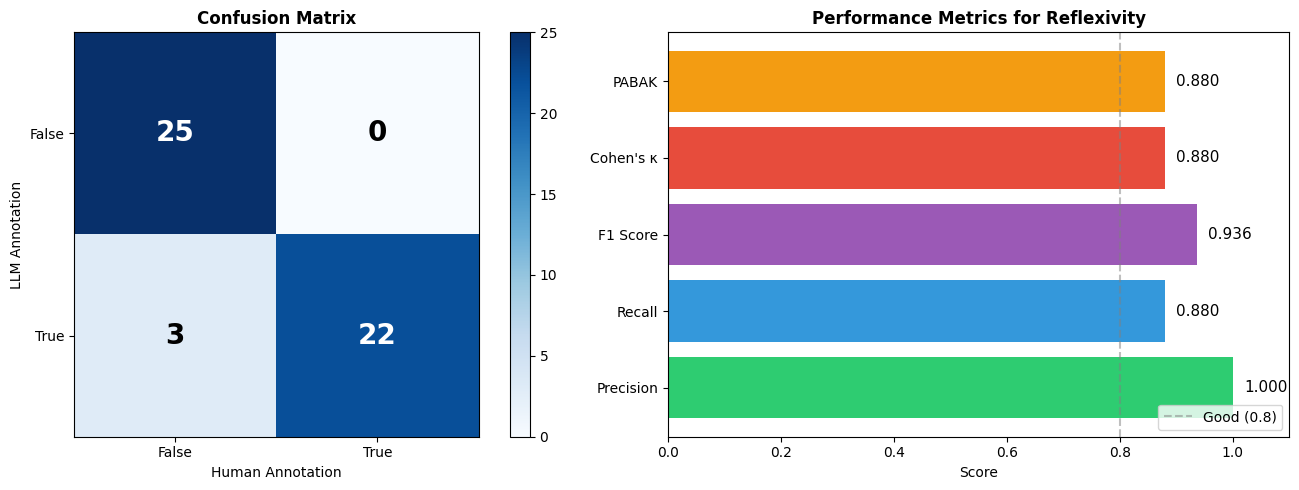


✓ Figure saved as: is_reflexive_iaa_analysis.png


In [61]:
# ============================================
# ALTERNATIVE: More detailed visualization
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Left: Confusion Matrix ---
ax1 = axes[0]
im = ax1.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax1.figure.colorbar(im, ax=ax1)

ax1.set(xticks=[0, 1],
        yticks=[0, 1],
        xticklabels=['False', 'True'],
        yticklabels=['False', 'True'],
        xlabel='Human Annotation',
        ylabel='LLM Annotation')
ax1.set_title('Confusion Matrix', fontsize=12, fontweight='bold')

thresh = cm.max() / 2
for i in range(2):
    for j in range(2):
        ax1.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=20, fontweight='bold')

# --- Right: Metrics Bar Chart ---
ax2 = axes[1]
metrics = ['Precision', 'Recall', 'F1 Score', "Cohen's κ", 'PABAK']
values = [precision, recall, f1, kappa, pabak]
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f39c12']

bars = ax2.barh(metrics, values, color=colors)
ax2.set_xlim(0, 1.1)
ax2.set_xlabel('Score')
ax2.set_title('Performance Metrics for Reflexivity', fontsize=12, fontweight='bold')

# Add value labels on bars
for bar, val in zip(bars, values):
    ax2.text(val + 0.02, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', fontsize=11)

# Add reference line at 0.8 (good threshold)
ax2.axvline(x=0.8, color='gray', linestyle='--', alpha=0.5, label='Good (0.8)')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.savefig('is_reflexive_iaa_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figure saved as: is_reflexive_iaa_analysis.png")

### 2. SCOPE_CLASSIFICATION: Confusion Matrix + Metrics

In [62]:
# ============================================
# SCOPE_CLASSIFICATION: Confusion Matrix + Metrics
# (Handles NaN values explicitly)
# ============================================
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report
import numpy as np

print("=" * 60)
print("SCOPE_CLASSIFICATION: Full Analysis")
print("=" * 60)

human_col = merged['scope_classification_human']
llm_col = merged['scope_classification_llm']

# --- NaN diagnostics ---
human_nan = human_col.isna().sum()
llm_nan = llm_col.isna().sum()
both_nan = (human_col.isna() & llm_col.isna()).sum()
either_nan = (human_col.isna() | llm_col.isna()).sum()

print(f"\n--- NaN Summary ---")
print(f"Human NaN:     {human_nan}")
print(f"LLM NaN:       {llm_nan}")
print(f"Both NaN:      {both_nan}")
print(f"Either NaN:    {either_nan}")
print(f"Complete cases: {len(merged) - either_nan}/{len(merged)}")

# --- Define valid labels ---
labels = ['MICRO', 'MESO', 'MACRO']

# --- Create masks for different analysis subsets ---
both_valid = human_col.notna() & llm_col.notna()
both_in_labels = both_valid & human_col.isin(labels) & llm_col.isin(labels)

# ============================================
# ANALYSIS 1: Complete cases only (standard metrics)
# ============================================
print("\n" + "=" * 60)
print("ANALYSIS ON COMPLETE CASES (excluding all NaN)")
print("=" * 60)

human_complete = human_col[both_in_labels]
llm_complete = llm_col[both_in_labels]

if len(human_complete) > 0:
    # --- Basic Agreement ---
    agree = (human_complete == llm_complete).sum()
    total = len(human_complete)
    pct = agree / total * 100

    print(f"\nAgreement: {agree}/{total} = {pct:.1f}%")

    # --- Cohen's Kappa (unweighted) ---
    kappa = cohen_kappa_score(human_complete, llm_complete)
    print(f"Cohen's κ (unweighted): {kappa:.3f}")

    # --- Cohen's Kappa (weighted - for ordinal data) ---
    scope_map = {'MICRO': 0, 'MESO': 1, 'MACRO': 2}
    human_num = human_complete.map(scope_map)
    llm_num = llm_complete.map(scope_map)
    kappa_weighted = cohen_kappa_score(human_num, llm_num, weights='linear')
    print(f"Cohen's κ (weighted):   {kappa_weighted:.3f}")

    # --- PABAK ---
    pabak = 2 * pct/100 - 1
    print(f"PABAK: {pabak:.3f}")

    # --- Confusion Matrix ---
    print("\n" + "-" * 40)
    print("CONFUSION MATRIX (rows=Human, cols=LLM)")
    print("-" * 40)
    cm = confusion_matrix(human_complete, llm_complete, labels=labels)

    # Proper orientation: rows = human (true), cols = LLM (predicted)
    print(f"{'':15} LLM=MICRO  LLM=MESO  LLM=MACRO")
    for i, label in enumerate(labels):
        print(f"Human={label:6}    {cm[i,0]:<9}  {cm[i,1]:<8}  {cm[i,2]}")

    # --- Per-class metrics ---
    print("\n" + "-" * 40)
    print("PER-CLASS METRICS")
    print("-" * 40)
    print(classification_report(human_complete, llm_complete, labels=labels, digits=3))
else:
    print("No complete cases available for analysis.")

# ============================================
# ANALYSIS 2: NaN as a category (if you want to treat it as valid)
# ============================================
print("\n" + "=" * 60)
print("NaN PATTERN ANALYSIS")
print("=" * 60)

# Replace NaN with explicit label for crosstab
human_with_nan = human_col.fillna('_NaN_')
llm_with_nan = llm_col.fillna('_NaN_')

labels_with_nan = ['MICRO', 'MESO', 'MACRO', '_NaN_']

print("\nCrosstab (including NaN as category):")
crosstab = pd.crosstab(human_with_nan, llm_with_nan,
                        rownames=['Human'], colnames=['LLM'],
                        dropna=False)
# Reorder to ensure consistent display
crosstab = crosstab.reindex(index=labels_with_nan, columns=labels_with_nan, fill_value=0)
print(crosstab)

# --- NaN agreement analysis ---
print("\n" + "-" * 40)
print("NaN-SPECIFIC PATTERNS")
print("-" * 40)

# Cases where human said NaN but LLM gave a label
human_nan_llm_label = merged[human_col.isna() & llm_col.notna()]
print(f"Human=NaN, LLM=label: {len(human_nan_llm_label)}")
if len(human_nan_llm_label) > 0:
    print(f"  LLM distribution: {llm_col[human_col.isna() & llm_col.notna()].value_counts().to_dict()}")

# Cases where LLM said NaN but human gave a label
llm_nan_human_label = merged[llm_col.isna() & human_col.notna()]
print(f"Human=label, LLM=NaN: {len(llm_nan_human_label)}")
if len(llm_nan_human_label) > 0:
    print(f"  Human distribution: {human_col[llm_col.isna() & human_col.notna()].value_counts().to_dict()}")

# ============================================
# DISAGREEMENTS (complete cases only)
# ============================================
print("\n" + "-" * 40)
print("DISAGREEMENTS (complete cases)")
print("-" * 40)

disagree_mask = both_in_labels & (human_col != llm_col)
disagree = merged[disagree_mask]

if len(disagree) > 0:
    for _, row in disagree.iterrows():
        print(f"  '{row['expression_human']}': Human={row['scope_classification_human']}, LLM={row['scope_classification_llm']}")
else:
    print("  None")

SCOPE_CLASSIFICATION: Full Analysis

--- NaN Summary ---
Human NaN:     3
LLM NaN:       3
Both NaN:      3
Either NaN:    3
Complete cases: 47/50

ANALYSIS ON COMPLETE CASES (excluding all NaN)

Agreement: 46/47 = 97.9%
Cohen's κ (unweighted): 0.965
Cohen's κ (weighted):   0.975
PABAK: 0.957

----------------------------------------
CONFUSION MATRIX (rows=Human, cols=LLM)
----------------------------------------
                LLM=MICRO  LLM=MESO  LLM=MACRO
Human=MICRO     24         0         0
Human=MESO      1          11        0
Human=MACRO     0          0         11

----------------------------------------
PER-CLASS METRICS
----------------------------------------
              precision    recall  f1-score   support

       MICRO      0.960     1.000     0.980        24
        MESO      1.000     0.917     0.957        12
       MACRO      1.000     1.000     1.000        11

    accuracy                          0.979        47
   macro avg      0.987     0.972     0.979  

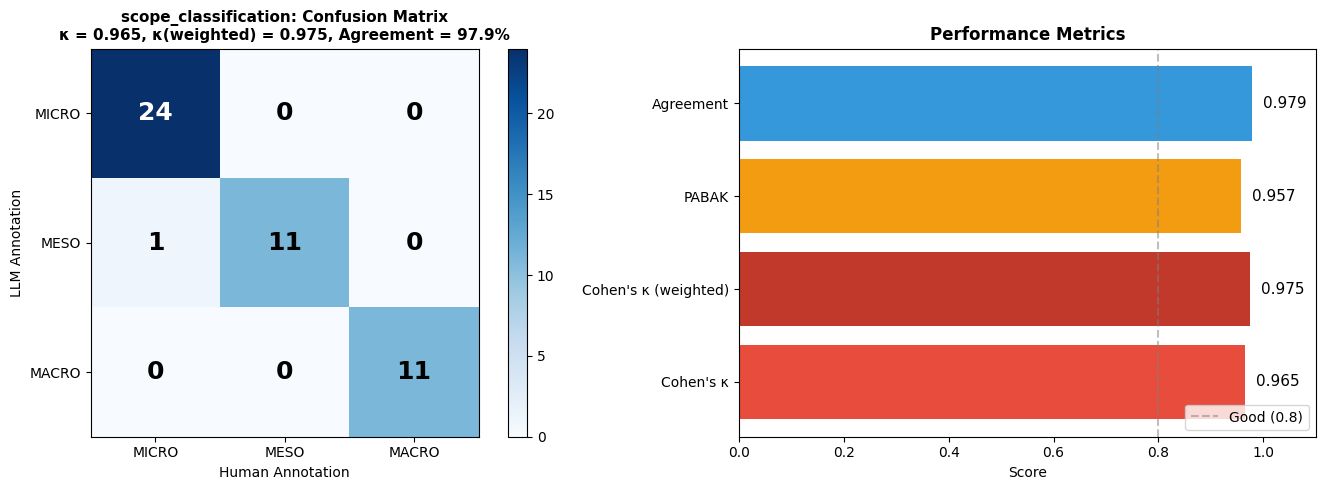


✓ Figure saved as: scope_classification_iaa_analysis.png


In [63]:
# ============================================
# VISUALIZE SCOPE CONFUSION MATRIX
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Left: Confusion Matrix ---
ax1 = axes[0]
im = ax1.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax1.figure.colorbar(im, ax=ax1)

labels = ['MICRO', 'MESO', 'MACRO']
ax1.set(xticks=[0, 1, 2],
        yticks=[0, 1, 2],
        xticklabels=labels,
        yticklabels=labels,
        xlabel='Human Annotation',
        ylabel='LLM Annotation')
ax1.set_title(f'scope_classification: Confusion Matrix\nκ = {kappa:.3f}, κ(weighted) = {kappa_weighted:.3f}, Agreement = {pct:.1f}%',
              fontsize=11, fontweight='bold')

thresh = cm.max() / 2
for i in range(3):
    for j in range(3):
        ax1.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=18, fontweight='bold')

# --- Right: Metrics Bar Chart ---
ax2 = axes[1]
metrics = ["Cohen's κ", "Cohen's κ (weighted)", 'PABAK', 'Agreement']
values = [kappa, kappa_weighted, pabak, pct/100]
colors = ['#e74c3c', '#c0392b', '#f39c12', '#3498db']

bars = ax2.barh(metrics, values, color=colors)
ax2.set_xlim(0, 1.1)
ax2.set_xlabel('Score')
ax2.set_title('Performance Metrics', fontsize=12, fontweight='bold')

# Add value labels on bars
for bar, val in zip(bars, values):
    ax2.text(val + 0.02, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', fontsize=11)

# Add reference line at 0.8
ax2.axvline(x=0.8, color='gray', linestyle='--', alpha=0.5, label='Good (0.8)')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.savefig('scope_classification_iaa_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figure saved as: scope_classification_iaa_analysis.png")

In [64]:
# ============================================
# L1_CLASSIFICATION: Confusion Matrix + Metrics (3 categories)
# ============================================
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

print("=" * 60)
print("L1_CLASSIFICATION: Full Analysis")
print("=" * 60)

human_col = merged['L1_classification_human']
llm_col = merged['L1_classification_llm']

# --- Check unique values ---
print("\nUnique values:")
print(f"Human: {human_col.unique()}")
print(f"LLM:   {llm_col.unique()}")

# --- Basic Agreement ---
agree = (human_col == llm_col).sum()
total = len(merged)
pct = agree / total * 100

print(f"\nAgreement: {agree}/{total} = {pct:.1f}%")

# --- Marginal Distributions ---
print("\n" + "-" * 40)
print("MARGINAL DISTRIBUTIONS")
print("-" * 40)

labels = ['MD', 'PROP', 'borderline']  # Adjust if your labels are different

for label in labels:
    human_count = (human_col == label).sum()
    llm_count = (llm_col == label).sum()
    print(f"{label:<12} Human: {human_count:>3} ({human_count/total*100:>5.1f}%)   LLM: {llm_count:>3} ({llm_count/total*100:>5.1f}%)")

# --- Cohen's Kappa ---
kappa = cohen_kappa_score(human_col, llm_col)
print(f"\nCohen's κ: {kappa:.3f}")

# --- PABAK ---
pabak = 2 * pct/100 - 1
print(f"PABAK:     {pabak:.3f}")

# --- Confusion Matrix ---
print("\n" + "-" * 40)
print("CONFUSION MATRIX")
print("-" * 40)

cm = confusion_matrix(human_col, llm_col, labels=labels)

print(f"                Human={labels[0]:<10} Human={labels[1]:<10} Human={labels[2]:<10}")
for i, label in enumerate(labels):
    print(f"LLM={label:<12}    {cm[i,0]:<12}    {cm[i,1]:<12}    {cm[i,2]:<12}")

# --- Per-class Metrics ---
print("\n" + "-" * 40)
print("PER-CLASS METRICS (Precision, Recall, F1)")
print("-" * 40)
print(classification_report(human_col, llm_col, labels=labels, digits=3, zero_division=0))

# --- Disagreements ---
print("\n" + "-" * 40)
print("DISAGREEMENTS")
print("-" * 40)
disagree = merged[human_col != llm_col]
if len(disagree) > 0:
    for _, row in disagree.iterrows():
        print(f"  '{row['expression_human']}': Human={row['L1_classification_human']}, LLM={row['L1_classification_llm']}")
else:
    print("  None")

L1_CLASSIFICATION: Full Analysis

Unique values:
Human: ['MD' 'PROP']
LLM:   ['MD' 'PROP']

Agreement: 49/50 = 98.0%

----------------------------------------
MARGINAL DISTRIBUTIONS
----------------------------------------
MD           Human:  46 ( 92.0%)   LLM:  47 ( 94.0%)
PROP         Human:   4 (  8.0%)   LLM:   3 (  6.0%)
borderline   Human:   0 (  0.0%)   LLM:   0 (  0.0%)

Cohen's κ: 0.847
PABAK:     0.960

----------------------------------------
CONFUSION MATRIX
----------------------------------------
                Human=MD         Human=PROP       Human=borderline
LLM=MD              46              0               0           
LLM=PROP            1               3               0           
LLM=borderline      0               0               0           

----------------------------------------
PER-CLASS METRICS (Precision, Recall, F1)
----------------------------------------
              precision    recall  f1-score   support

          MD      0.979     1.000     0.9

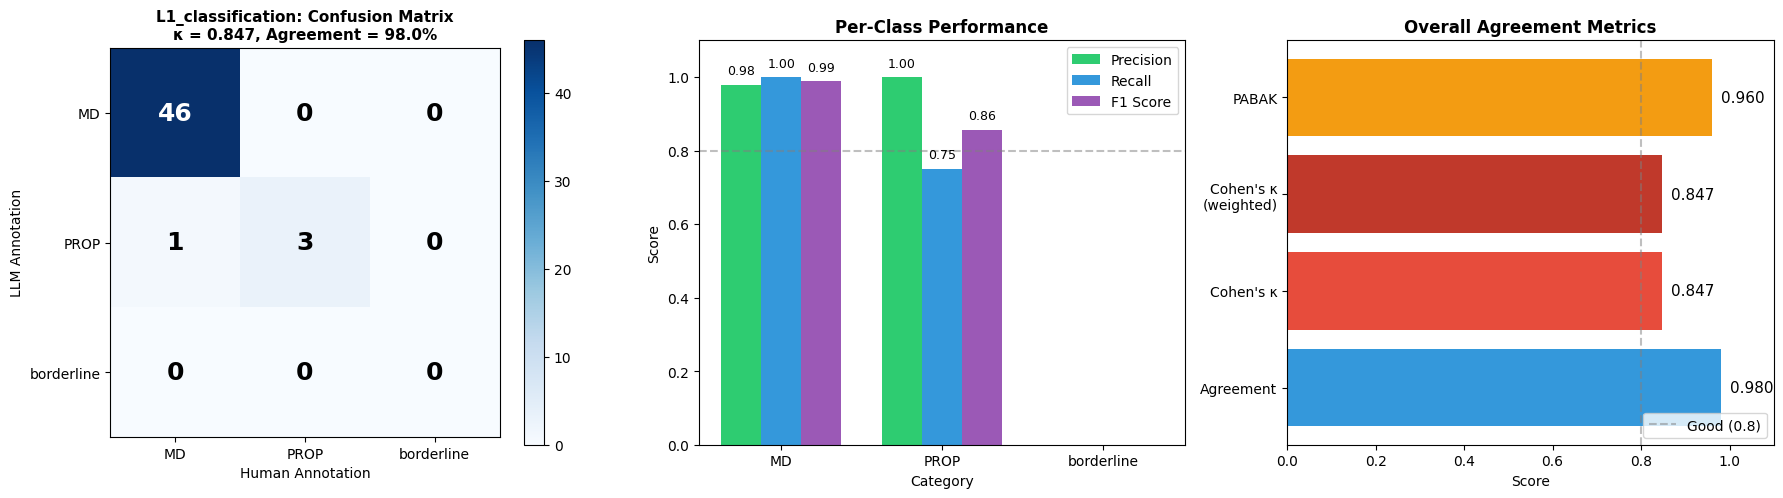


✓ Figure saved as: L1_classification_3cat_iaa_analysis.png


In [65]:
# ============================================
# VISUALIZE L1 CONFUSION MATRIX (3x3) + All Metrics
# ============================================
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# --- Calculate weighted kappa (for ordinal interpretation) ---
# Map categories to ordinal scale: MD=0, borderline=1, PROP=2
ordinal_map = {'MD': 0, 'borderline': 1, 'PROP': 2}
human_ordinal = human_col.map(ordinal_map)
llm_ordinal = llm_col.map(ordinal_map)
kappa_weighted = cohen_kappa_score(human_ordinal, llm_ordinal, weights='linear')

# --- Create figure with 3 subplots ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ============================================
# Left: Confusion Matrix
# ============================================
ax1 = axes[0]
im = ax1.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax1.figure.colorbar(im, ax=ax1)

ax1.set(xticks=[0, 1, 2],
        yticks=[0, 1, 2],
        xticklabels=labels,
        yticklabels=labels,
        xlabel='Human Annotation',
        ylabel='LLM Annotation')
ax1.set_title(f'L1_classification: Confusion Matrix\nκ = {kappa:.3f}, Agreement = {pct:.1f}%',
              fontsize=11, fontweight='bold')

thresh = cm.max() / 2
for i in range(3):
    for j in range(3):
        ax1.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=18, fontweight='bold')

# ============================================
# Middle: Per-class F1 scores
# ============================================
ax2 = axes[1]

f1_per_class = []
prec_per_class = []
rec_per_class = []

for label in labels:
    human_binary = (human_col == label).astype(int)
    llm_binary = (llm_col == label).astype(int)
    f1_per_class.append(f1_score(human_binary, llm_binary, zero_division=0))
    prec_per_class.append(precision_score(human_binary, llm_binary, zero_division=0))
    rec_per_class.append(recall_score(human_binary, llm_binary, zero_division=0))

x = np.arange(len(labels))
width = 0.25

bars1 = ax2.bar(x - width, prec_per_class, width, label='Precision', color='#2ecc71')
bars2 = ax2.bar(x, rec_per_class, width, label='Recall', color='#3498db')
bars3 = ax2.bar(x + width, f1_per_class, width, label='F1 Score', color='#9b59b6')

ax2.set_xlabel('Category')
ax2.set_ylabel('Score')
ax2.set_title('Per-Class Performance', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylim(0, 1.1)
ax2.legend()
ax2.axhline(y=0.8, color='gray', linestyle='--', alpha=0.5)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                     f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# ============================================
# Right: Overall Metrics (Agreement, Kappa, Weighted Kappa, PABAK)
# ============================================
ax3 = axes[2]

metrics = ['Agreement', "Cohen's κ", "Cohen's κ\n(weighted)", 'PABAK']
values = [pct/100, kappa, kappa_weighted, pabak]
colors = ['#3498db', '#e74c3c', '#c0392b', '#f39c12']

bars = ax3.barh(metrics, values, color=colors)
ax3.set_xlim(0, 1.1)
ax3.set_xlabel('Score')
ax3.set_title('Overall Agreement Metrics', fontsize=12, fontweight='bold')

# Add value labels
for bar, val in zip(bars, values):
    ax3.text(val + 0.02, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', fontsize=11)

# Add reference line at 0.8
ax3.axvline(x=0.8, color='gray', linestyle='--', alpha=0.5, label='Good (0.8)')
ax3.legend(loc='lower right')

plt.tight_layout()
plt.savefig('L1_classification_3cat_iaa_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figure saved as: L1_classification_3cat_iaa_analysis.png")

In [66]:
# ============================================
# PRINT ALL METRICS SUMMARY
# ============================================
print("=" * 60)
print("L1_CLASSIFICATION: ALL METRICS SUMMARY")
print("=" * 60)

print(f"\n--- Overall Metrics ---")
print(f"Agreement:              {pct:.1f}%")
print(f"Cohen's κ:              {kappa:.3f}")
print(f"Cohen's κ (weighted):   {kappa_weighted:.3f}")
print(f"PABAK:                  {pabak:.3f}")

print(f"\n--- Per-Class Metrics ---")
print(f"{'Category':<12} {'Precision':<12} {'Recall':<12} {'F1':<12}")
print("-" * 48)
for i, label in enumerate(labels):
    print(f"{label:<12} {prec_per_class[i]:<12.3f} {rec_per_class[i]:<12.3f} {f1_per_class[i]:<12.3f}")

print(f"\n--- Macro Averages ---")
print(f"Macro Precision: {np.mean(prec_per_class):.3f}")
print(f"Macro Recall:    {np.mean(rec_per_class):.3f}")
print(f"Macro F1:        {np.mean(f1_per_class):.3f}")

L1_CLASSIFICATION: ALL METRICS SUMMARY

--- Overall Metrics ---
Agreement:              98.0%
Cohen's κ:              0.847
Cohen's κ (weighted):   0.847
PABAK:                  0.960

--- Per-Class Metrics ---
Category     Precision    Recall       F1          
------------------------------------------------
MD           0.979        1.000        0.989       
PROP         1.000        0.750        0.857       
borderline   0.000        0.000        0.000       

--- Macro Averages ---
Macro Precision: 0.660
Macro Recall:    0.583
Macro F1:        0.615


In [67]:
# ============================================
# L2_CLASSIFICATION: Full Analysis (including PROP/NaN)
# ============================================
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("=" * 60)
print("L2_CLASSIFICATION: Full Analysis")
print("=" * 60)

# --- Create a copy and replace NaN with 'PROP' ---
merged_l2 = merged.copy()
merged_l2['L2_classification_human'] = merged_l2['L2_classification_human'].fillna('PROP')
merged_l2['L2_classification_llm'] = merged_l2['L2_classification_llm'].fillna('PROP')

# Also replace empty strings with 'PROP'
merged_l2['L2_classification_human'] = merged_l2['L2_classification_human'].replace('', 'PROP')
merged_l2['L2_classification_llm'] = merged_l2['L2_classification_llm'].replace('', 'PROP')

human_col = merged_l2['L2_classification_human']
llm_col = merged_l2['L2_classification_llm']

# --- Check unique values ---
print("\nUnique values (after converting NaN to PROP):")
print(f"Human: {human_col.unique()}")
print(f"LLM:   {llm_col.unique()}")

# --- Basic Agreement ---
agree = (human_col == llm_col).sum()
total = len(merged_l2)
pct = agree / total * 100

print(f"\nAgreement: {agree}/{total} = {pct:.1f}%")

# --- Marginal Distributions ---
print("\n" + "-" * 40)
print("MARGINAL DISTRIBUTIONS")
print("-" * 40)

labels = ['INT_ACTIVE', 'INT_ACTIONAL', 'PROP']

for label in labels:
    human_count = (human_col == label).sum()
    llm_count = (llm_col == label).sum()
    print(f"{label:<15} Human: {human_count:>3} ({human_count/total*100:>5.1f}%)   LLM: {llm_count:>3} ({llm_count/total*100:>5.1f}%)")

# --- Cohen's Kappa ---
kappa = cohen_kappa_score(human_col, llm_col)
print(f"\nCohen's κ: {kappa:.3f}")

# --- Weighted Kappa (ordinal: INT_ACTIVE -> INT_ACTIONAL -> PROP) ---
ordinal_map = {'INT_ACTIVE': 0, 'INT_ACTIONAL': 1, 'PROP': 2}
human_ordinal = human_col.map(ordinal_map)
llm_ordinal = llm_col.map(ordinal_map)
kappa_weighted = cohen_kappa_score(human_ordinal, llm_ordinal, weights='linear')
print(f"Cohen's κ (weighted): {kappa_weighted:.3f}")

# --- PABAK ---
pabak = 2 * pct/100 - 1
print(f"PABAK: {pabak:.3f}")

# --- Confusion Matrix ---
print("\n" + "-" * 40)
print("CONFUSION MATRIX")
print("-" * 40)

cm = confusion_matrix(human_col, llm_col, labels=labels)

print(f"                   Human=INT_ACTIVE  Human=INT_ACTIONAL  Human=PROP")
print(f"LLM=INT_ACTIVE          {cm[0,0]:<12}       {cm[0,1]:<12}      {cm[0,2]}")
print(f"LLM=INT_ACTIONAL        {cm[1,0]:<12}       {cm[1,1]:<12}      {cm[1,2]}")
print(f"LLM=PROP                {cm[2,0]:<12}       {cm[2,1]:<12}      {cm[2,2]}")

# --- Per-class Metrics ---
print("\n" + "-" * 40)
print("PER-CLASS METRICS (Precision, Recall, F1)")
print("-" * 40)
print(classification_report(human_col, llm_col, labels=labels, digits=3, zero_division=0))

# --- Disagreements ---
print("\n" + "-" * 40)
print("DISAGREEMENTS")
print("-" * 40)
disagree = merged_l2[human_col != llm_col]
if len(disagree) > 0:
    for _, row in disagree.iterrows():
        print(f"  '{row['expression_human']}': Human={row['L2_classification_human']}, LLM={row['L2_classification_llm']}")
else:
    print("  None")

L2_CLASSIFICATION: Full Analysis

Unique values (after converting NaN to PROP):
Human: ['INT_ACTIVE' 'INT_ACTIONAL' 'PROP']
LLM:   ['INT_ACTIVE' 'INT_ACTIONAL' 'PROP']

Agreement: 50/50 = 100.0%

----------------------------------------
MARGINAL DISTRIBUTIONS
----------------------------------------
INT_ACTIVE      Human:  39 ( 78.0%)   LLM:  39 ( 78.0%)
INT_ACTIONAL    Human:   8 ( 16.0%)   LLM:   8 ( 16.0%)
PROP            Human:   3 (  6.0%)   LLM:   3 (  6.0%)

Cohen's κ: 1.000
Cohen's κ (weighted): 1.000
PABAK: 1.000

----------------------------------------
CONFUSION MATRIX
----------------------------------------
                   Human=INT_ACTIVE  Human=INT_ACTIONAL  Human=PROP
LLM=INT_ACTIVE          39                 0                 0
LLM=INT_ACTIONAL        0                  8                 0
LLM=PROP                0                  0                 3

----------------------------------------
PER-CLASS METRICS (Precision, Recall, F1)
-------------------------------

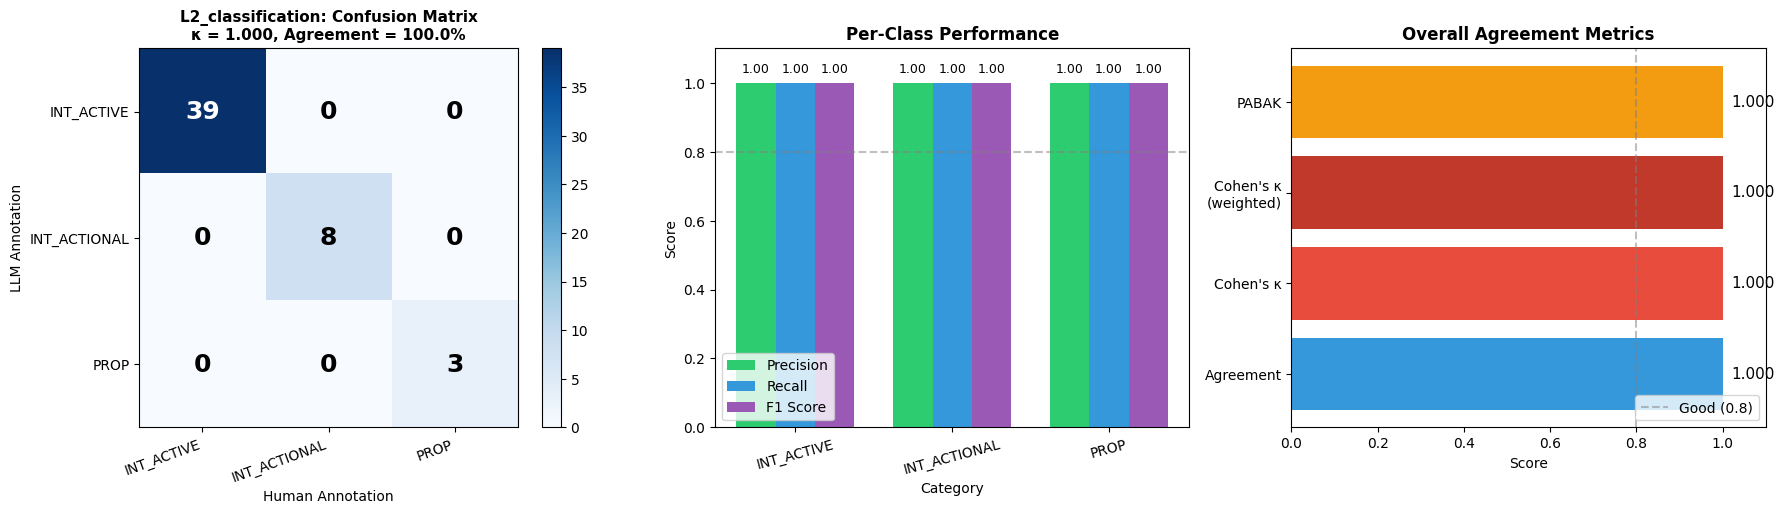


✓ Figure saved as: L2_classification_iaa_analysis.png


In [68]:
# ============================================
# VISUALIZE L2 CONFUSION MATRIX + All Metrics
# ============================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ============================================
# Left: Confusion Matrix (3x3)
# ============================================
ax1 = axes[0]
im = ax1.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax1.figure.colorbar(im, ax=ax1)

ax1.set(xticks=[0, 1, 2],
        yticks=[0, 1, 2],
        xticklabels=labels,
        yticklabels=labels,
        xlabel='Human Annotation',
        ylabel='LLM Annotation')
ax1.set_title(f'L2_classification: Confusion Matrix\nκ = {kappa:.3f}, Agreement = {pct:.1f}%',
              fontsize=11, fontweight='bold')

# Rotate x labels for readability
plt.setp(ax1.get_xticklabels(), rotation=20, ha='right')

thresh = cm.max() / 2
for i in range(3):
    for j in range(3):
        ax1.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=18, fontweight='bold')

# ============================================
# Middle: Per-class F1 scores
# ============================================
ax2 = axes[1]

f1_per_class = []
prec_per_class = []
rec_per_class = []

for label in labels:
    human_binary = (human_col == label).astype(int)
    llm_binary = (llm_col == label).astype(int)
    f1_per_class.append(f1_score(human_binary, llm_binary, zero_division=0))
    prec_per_class.append(precision_score(human_binary, llm_binary, zero_division=0))
    rec_per_class.append(recall_score(human_binary, llm_binary, zero_division=0))

x = np.arange(len(labels))
width = 0.25

bars1 = ax2.bar(x - width, prec_per_class, width, label='Precision', color='#2ecc71')
bars2 = ax2.bar(x, rec_per_class, width, label='Recall', color='#3498db')
bars3 = ax2.bar(x + width, f1_per_class, width, label='F1 Score', color='#9b59b6')

ax2.set_xlabel('Category')
ax2.set_ylabel('Score')
ax2.set_title('Per-Class Performance', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=15)
ax2.set_ylim(0, 1.1)
ax2.legend()
ax2.axhline(y=0.8, color='gray', linestyle='--', alpha=0.5)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                     f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# ============================================
# Right: Overall Metrics
# ============================================
ax3 = axes[2]

metrics = ['Agreement', "Cohen's κ", "Cohen's κ\n(weighted)", 'PABAK']
values = [pct/100, kappa, kappa_weighted, pabak]
colors = ['#3498db', '#e74c3c', '#c0392b', '#f39c12']

bars = ax3.barh(metrics, values, color=colors)
ax3.set_xlim(0, 1.1)
ax3.set_xlabel('Score')
ax3.set_title('Overall Agreement Metrics', fontsize=12, fontweight='bold')

# Add value labels
for bar, val in zip(bars, values):
    ax3.text(val + 0.02, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', fontsize=11)

# Add reference line at 0.8
ax3.axvline(x=0.8, color='gray', linestyle='--', alpha=0.5, label='Good (0.8)')
ax3.legend(loc='lower right')

plt.tight_layout()
plt.savefig('L2_classification_iaa_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figure saved as: L2_classification_iaa_analysis.png")

In [69]:
# ============================================
# L3_CLASSIFICATION: Full Analysis
# ============================================
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("=" * 60)
print("L3_CLASSIFICATION: Full Analysis")
print("=" * 60)

# --- Create a copy and replace NaN/empty with 'PROP' ---
merged_l3 = merged.copy()
merged_l3['L3_classification_human'] = merged_l3['L3_classification_human'].fillna('PROP')
merged_l3['L3_classification_llm'] = merged_l3['L3_classification_llm'].fillna('PROP')
merged_l3['L3_classification_human'] = merged_l3['L3_classification_human'].replace('', 'PROP')
merged_l3['L3_classification_llm'] = merged_l3['L3_classification_llm'].replace('', 'PROP')

human_col = merged_l3['L3_classification_human']
llm_col = merged_l3['L3_classification_llm']

# --- Check unique values ---
print("\nUnique values (after converting NaN to PROP):")
print(f"Human: {sorted(human_col.unique())}")
print(f"LLM:   {sorted(llm_col.unique())}")

# --- Define full taxonomy ---
labels = [
    'Transition',
    'Frame Marker',
    'Endophoric Marker',
    'Evidential',
    'Code Gloss',
    'Hedge',
    'Booster',
    'Attitude Marker',
    'Self-Mention',
    'Engagement Marker',
    'PROP'
]

# --- Check which labels actually appear in the data ---
all_labels_in_data = set(human_col.unique()) | set(llm_col.unique())
print(f"\nLabels in data: {sorted(all_labels_in_data)}")

# Filter labels to only those present in data
labels_present = [l for l in labels if l in all_labels_in_data]
# Add any labels in data that aren't in our predefined list
extra_labels = [l for l in all_labels_in_data if l not in labels]
labels_present.extend(extra_labels)

print(f"Labels used for analysis: {labels_present}")

# --- Basic Agreement ---
agree = (human_col == llm_col).sum()
total = len(merged_l3)
pct = agree / total * 100

print(f"\nAgreement: {agree}/{total} = {pct:.1f}%")

# --- Marginal Distributions ---
print("\n" + "-" * 50)
print("MARGINAL DISTRIBUTIONS")
print("-" * 50)
print(f"{'Category':<25} {'Human':>8} {'%':>7} {'LLM':>8} {'%':>7}")
print("-" * 50)

for label in labels_present:
    human_count = (human_col == label).sum()
    llm_count = (llm_col == label).sum()
    if human_count > 0 or llm_count > 0:
        print(f"{label:<25} {human_count:>8} {human_count/total*100:>6.1f}% {llm_count:>8} {llm_count/total*100:>6.1f}%")

# --- Cohen's Kappa ---
kappa = cohen_kappa_score(human_col, llm_col)
print(f"\nCohen's κ: {kappa:.3f}")

# --- PABAK ---
pabak = 2 * pct/100 - 1
print(f"PABAK: {pabak:.3f}")

# --- Confusion Matrix ---
print("\n" + "-" * 50)
print("CONFUSION MATRIX")
print("-" * 50)

cm = confusion_matrix(human_col, llm_col, labels=labels_present)
print(f"\nMatrix shape: {cm.shape}")

# --- Per-class Metrics ---
print("\n" + "-" * 50)
print("PER-CLASS METRICS (Precision, Recall, F1)")
print("-" * 50)
print(classification_report(human_col, llm_col, labels=labels_present, digits=3, zero_division=0))

# --- Disagreements ---
print("\n" + "-" * 50)
print("DISAGREEMENTS")
print("-" * 50)
disagree = merged_l3[human_col != llm_col]
print(f"Total disagreements: {len(disagree)}")
if len(disagree) > 0:
    for _, row in disagree.iterrows():
        print(f"  '{row['expression_human']}': Human={row['L3_classification_human']}, LLM={row['L3_classification_llm']}")
else:
    print("  None")

L3_CLASSIFICATION: Full Analysis

Unique values (after converting NaN to PROP):
Human: ['Attitude Marker', 'Booster', 'Endophoric Marker', 'Engagement Marker', 'Evidential', 'Evidentials', 'Frame Marker', 'Frame Markers', 'Hedge', 'PROP', 'Transition']
LLM:   ['Attitude Marker', 'Booster', 'Endophoric Marker', 'Engagement Marker', 'Evidential', 'Evidentials', 'Frame Marker', 'Frame Markers', 'Hedge', 'PROP', 'Transition']

Labels in data: ['Attitude Marker', 'Booster', 'Endophoric Marker', 'Engagement Marker', 'Evidential', 'Evidentials', 'Frame Marker', 'Frame Markers', 'Hedge', 'PROP', 'Transition']
Labels used for analysis: ['Transition', 'Frame Marker', 'Endophoric Marker', 'Evidential', 'Hedge', 'Booster', 'Attitude Marker', 'Engagement Marker', 'PROP', 'Frame Markers', 'Evidentials']

Agreement: 50/50 = 100.0%

--------------------------------------------------
MARGINAL DISTRIBUTIONS
--------------------------------------------------
Category                     Human       %    

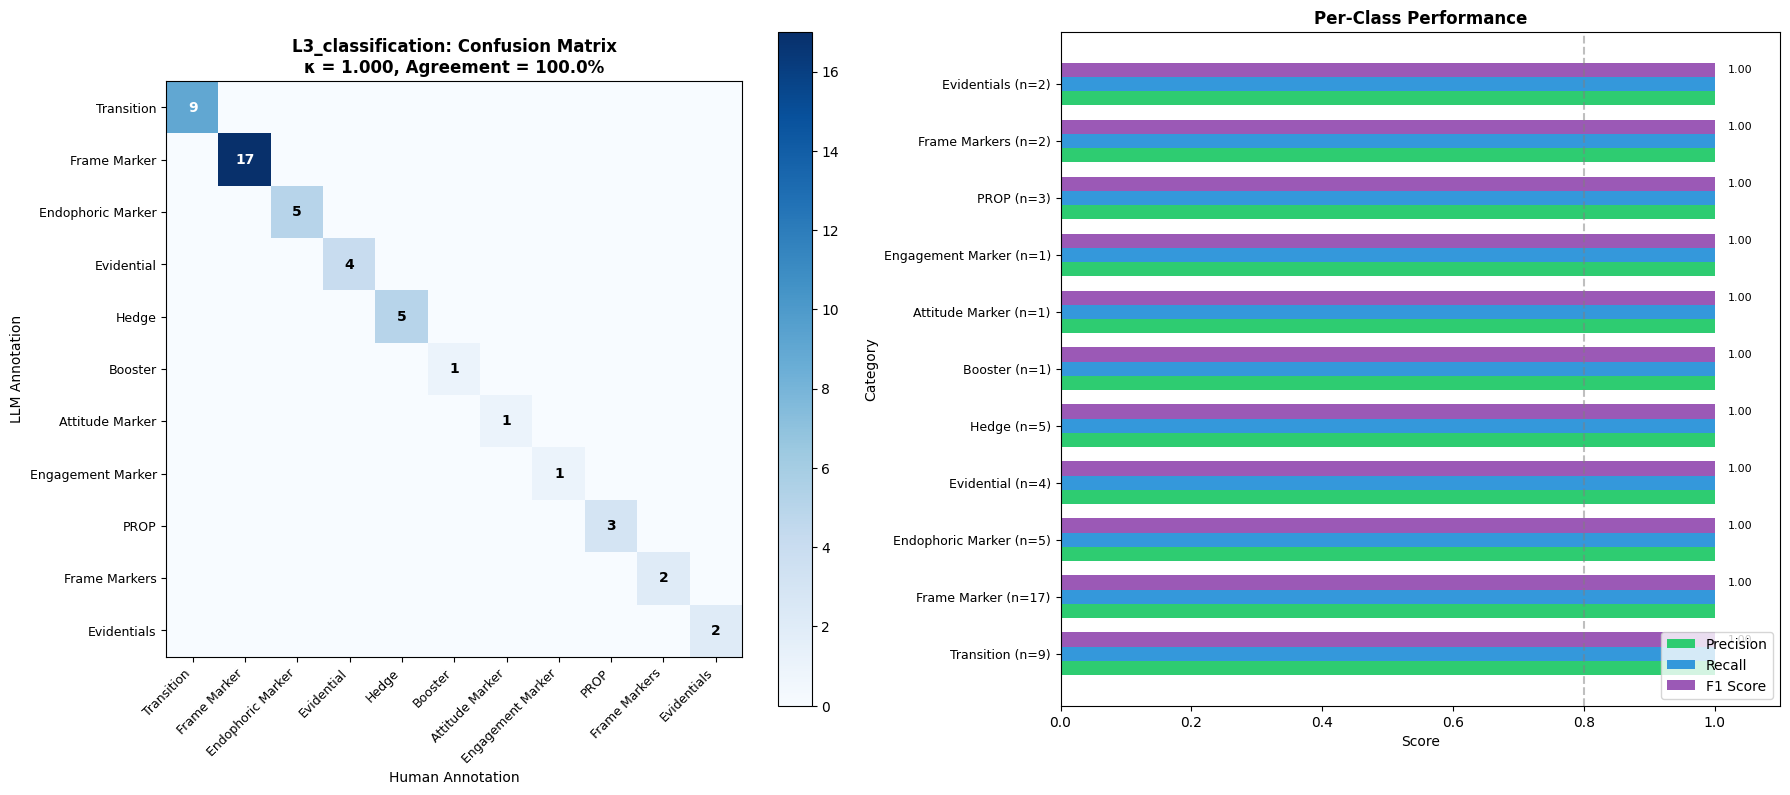


✓ Figure saved as: L3_classification_iaa_analysis.png


In [70]:
# ============================================
# VISUALIZE L3 CONFUSION MATRIX
# ============================================

# Create larger figure for many categories
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# ============================================
# Left: Confusion Matrix (heatmap)
# ============================================
ax1 = axes[0]
im = ax1.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax1.figure.colorbar(im, ax=ax1)

ax1.set(xticks=np.arange(len(labels_present)),
        yticks=np.arange(len(labels_present)),
        xticklabels=labels_present,
        yticklabels=labels_present,
        xlabel='Human Annotation',
        ylabel='LLM Annotation')
ax1.set_title(f'L3_classification: Confusion Matrix\nκ = {kappa:.3f}, Agreement = {pct:.1f}%',
              fontsize=12, fontweight='bold')

# Rotate x labels for readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.setp(ax1.get_yticklabels(), fontsize=9)

# Add text annotations
thresh = cm.max() / 2
for i in range(len(labels_present)):
    for j in range(len(labels_present)):
        if cm[i, j] > 0:  # Only show non-zero values
            ax1.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=10, fontweight='bold')

# ============================================
# Right: Per-class F1 scores (horizontal bar)
# ============================================
ax2 = axes[1]

f1_per_class = []
prec_per_class = []
rec_per_class = []
support_per_class = []

for label in labels_present:
    human_binary = (human_col == label).astype(int)
    llm_binary = (llm_col == label).astype(int)
    f1_per_class.append(f1_score(human_binary, llm_binary, zero_division=0))
    prec_per_class.append(precision_score(human_binary, llm_binary, zero_division=0))
    rec_per_class.append(recall_score(human_binary, llm_binary, zero_division=0))
    support_per_class.append(human_binary.sum())

# Create horizontal bar chart
y = np.arange(len(labels_present))
height = 0.25

bars1 = ax2.barh(y - height, prec_per_class, height, label='Precision', color='#2ecc71')
bars2 = ax2.barh(y, rec_per_class, height, label='Recall', color='#3498db')
bars3 = ax2.barh(y + height, f1_per_class, height, label='F1 Score', color='#9b59b6')

ax2.set_xlabel('Score')
ax2.set_ylabel('Category')
ax2.set_title('Per-Class Performance', fontsize=12, fontweight='bold')
ax2.set_yticks(y)
ax2.set_yticklabels([f"{l} (n={s})" for l, s in zip(labels_present, support_per_class)], fontsize=9)
ax2.set_xlim(0, 1.1)
ax2.legend(loc='lower right')
ax2.axvline(x=0.8, color='gray', linestyle='--', alpha=0.5, label='Good (0.8)')

# Add value labels
for bars in [bars3]:  # Only show F1 labels to avoid clutter
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            ax2.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                     f'{width:.2f}', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('L3_classification_iaa_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figure saved as: L3_classification_iaa_analysis.png")

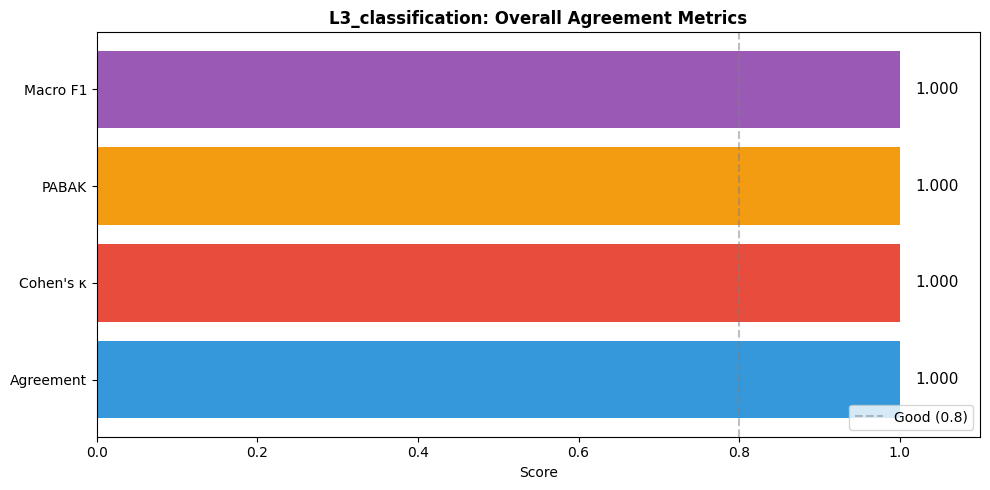


✓ Figure saved as: L3_classification_overall_metrics.png


In [71]:
# ============================================
# Overall Metrics Visualization
# ============================================

fig, ax = plt.subplots(figsize=(10, 5))

metrics = ['Agreement', "Cohen's κ", 'PABAK', 'Macro F1']
values = [pct/100, kappa, pabak, np.mean(f1_per_class)]
colors = ['#3498db', '#e74c3c', '#f39c12', '#9b59b6']

bars = ax.barh(metrics, values, color=colors)
ax.set_xlim(0, 1.1)
ax.set_xlabel('Score')
ax.set_title('L3_classification: Overall Agreement Metrics', fontsize=12, fontweight='bold')

# Add value labels
for bar, val in zip(bars, values):
    ax.text(val + 0.02, bar.get_y() + bar.get_height()/2,
            f'{val:.3f}', va='center', fontsize=11)

# Add reference line at 0.8
ax.axvline(x=0.8, color='gray', linestyle='--', alpha=0.5, label='Good (0.8)')
ax.legend(loc='lower right')

plt.tight_layout()
plt.savefig('L3_classification_overall_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figure saved as: L3_classification_overall_metrics.png")

In [72]:
# ============================================
# PRINT ALL METRICS SUMMARY
# ============================================
print("=" * 70)
print("L3_CLASSIFICATION: ALL METRICS SUMMARY")
print("=" * 70)

print(f"\n--- L3 Taxonomy ---")
print("Interactive MD:    Transitions, Frame Markers, Endophoric Markers, Evidentials, Code Glosses")
print("Interactional MD:  Hedges, Boosters, Attitude Markers, Self-Mentions, Engagement Markers")
print("Non-MD:            PROP (propositional)")

print(f"\n--- Overall Metrics ---")
print(f"Total items:            {total}")
print(f"Agreement:              {pct:.1f}%")
print(f"Cohen's κ:              {kappa:.3f}")
print(f"PABAK:                  {pabak:.3f}")

print(f"\n--- Per-Class Metrics ---")
print(f"{'Category':<25} {'N(Human)':<10} {'Precision':<12} {'Recall':<12} {'F1':<12}")
print("-" * 70)
for i, label in enumerate(labels_present):
    n_human = (human_col == label).sum()
    print(f"{label:<25} {n_human:<10} {prec_per_class[i]:<12.3f} {rec_per_class[i]:<12.3f} {f1_per_class[i]:<12.3f}")

print("-" * 70)
print(f"\n--- Macro Averages ---")
print(f"Macro Precision: {np.mean(prec_per_class):.3f}")
print(f"Macro Recall:    {np.mean(rec_per_class):.3f}")
print(f"Macro F1:        {np.mean(f1_per_class):.3f}")

# --- Error Analysis by Type ---
print(f"\n" + "=" * 70)
print("ERROR ANALYSIS: Disagreement Patterns")
print("=" * 70)

if len(disagree) > 0:
    # Create confusion pairs
    error_pairs = disagree.groupby(['L3_classification_human', 'L3_classification_llm']).size().reset_index(name='count')
    error_pairs = error_pairs.sort_values('count', ascending=False)

    print(f"\n{'Human Label':<25} {'LLM Label':<25} {'Count':<10}")
    print("-" * 60)
    for _, row in error_pairs.iterrows():
        print(f"{row['L3_classification_human']:<25} {row['L3_classification_llm']:<25} {row['count']:<10}")
else:
    print("No disagreements!")

L3_CLASSIFICATION: ALL METRICS SUMMARY

--- L3 Taxonomy ---
Interactive MD:    Transitions, Frame Markers, Endophoric Markers, Evidentials, Code Glosses
Interactional MD:  Hedges, Boosters, Attitude Markers, Self-Mentions, Engagement Markers
Non-MD:            PROP (propositional)

--- Overall Metrics ---
Total items:            50
Agreement:              100.0%
Cohen's κ:              1.000
PABAK:                  1.000

--- Per-Class Metrics ---
Category                  N(Human)   Precision    Recall       F1          
----------------------------------------------------------------------
Transition                9          1.000        1.000        1.000       
Frame Marker              17         1.000        1.000        1.000       
Endophoric Marker         5          1.000        1.000        1.000       
Evidential                4          1.000        1.000        1.000       
Hedge                     5          1.000        1.000        1.000       
Booster              